In [67]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random as r

In [68]:
def ReLU(x):
    if x>0:
        return x
    else:
        return 0
def dReLU(x):
    if x>0:
        return 1
    else:
        return 0

In [69]:
class perceptron:
    def __init__(self):
        self.b = r.random()
        self.weights = list()
        self.inputs = list()
        self.no_of_connections = 1
    def set_connections(self,x):
        if x < 200 and x>0:
            self.no_of_connections = x
            for i in range(x):
                self.weights.append(r.random())
    def load_input(self,input_arr):
        if len(input_arr) == self.no_of_connections:
            self.inputs.clear()
            for x in input_arr:
                self.inputs.append(x)
    def z(self): #Returns Weighted Sum
        z=0
        for i in range(self.no_of_connections):
            z+=self.weights[i]*self.inputs[i]
        z+=self.b
        return z
    def prediction(self): #ReLU's Weighted Sum
        z=self.z()
        p=ReLU(z)
        return p
    def backpropogation(self,target,learning_rate):
        L=learning_rate
        de_dwi = []
        e = (self.prediction() - target)**2
        de_dp = 2*(self.prediction() - target)
        dp_dz = dReLU(self.z())
        dz_dwi = self.inputs
        dz_db = 1
        de_db = de_dp*dp_dz*dz_db 
        
        for i in range(len(dz_dwi)):
            de_dwi.append(de_dp*dp_dz*dz_dwi[i])
            self.weights[i]-=L*de_dwi[i]
        self.b-=L*de_db
        
        return e

In [70]:
data = pd.read_csv("StudentsPerformance.csv")
m_score=data.mathscore
g=pd.Series.tolist(data.gender)
l=pd.Series.tolist(data.lunch)
t=pd.Series.tolist(data.testpreparationcourse)
m=pd.Series.tolist(data.mathscore)
race=pd.Series.tolist(data.race)

for x in range(len(race)):
    if race[x]=="group A":
        race[x]=1
    elif race[x]=="group B":
        race[x] = 2
    elif race[x]=="group C":
        race[x] = 3
    elif race[x]=="group D":
        race[x] = 4
    else:
        race[x] = 5

for x in range(len(t)):
    if t[x]=="none":
        t[x]=0
    else:
        t[x] = 1

for x in range(len(l)):
    if l[x]=="standard":
        l[x]=1
    else:
        l[x] = 2

for x in range(len(g)):
    if g[x]=="female":
        g[x]=1
    else:
        g[x] = 2

358.82194187381


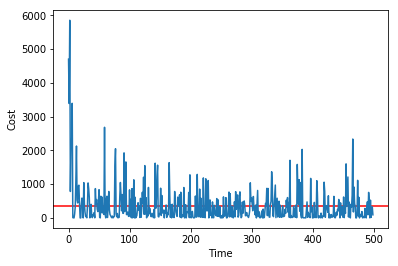

In [73]:
learning_rate=0.005
costs = []
avg_cost=0
neuron = perceptron()
neuron.set_connections(4)

#Data: g,l,t,race,m
#Training Loop
for i in range(500):
    inputs = []
    inputs.append(g[i])
    inputs.append(l[i])
    inputs.append(t[i])
    inputs.append(race[i])
    neuron.load_input(inputs)
    target = m[i]
    cost = neuron.backpropogation(target,learning_rate)
    costs.append(cost)
    avg_cost+=cost

avg_cost/=len(costs)
plt.ylabel("Cost")
plt.xlabel("Time")
plt.axhline(avg_cost,color='r')
plt.plot(costs)
print(avg_cost)

Average Error:  22.30895543603779 %
Percentage of Predictions with 90% accuracy and above:  34.8 %


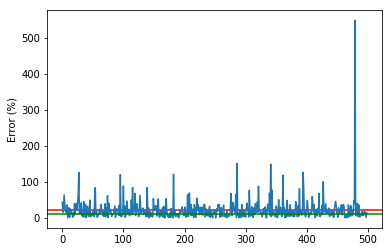

In [104]:
#Training
accuracy = list()
avg_acc=0
n=0
for i in range(501,1000):
    inputs = []
    inputs.append(g[i])
    inputs.append(l[i])
    inputs.append(t[i])
    inputs.append(race[i])
    neuron.load_input(inputs)
    target=m[i]
    error = target - neuron.prediction()
    error_percentage = np.fabs(error)/target*100
    accuracy.append(error_percentage)
    if error_percentage < 10 and error_percentage>0:
        n+=1
    avg_acc+=error_percentage
avg_acc/=len(accuracy)
plt.axhline(avg_acc,color='r')
plt.plot(accuracy)
print("Average Error: ", avg_acc, "%")
print("Percentage of Predictions with 90% accuracy and above: ",n/500*100,"%")
plt.ylabel('Error (%)')
plt.axhline(10,color='g')

In [105]:
i=727
inputs = []
inputs.append(g[i]) 
inputs.append(l[i])
inputs.append(t[i])
inputs.append(race[i])
neuron.load_input(inputs)
target=m[i]
print(neuron.prediction(),target)
print(100 - (np.fabs(neuron.prediction()- target)/target*100))

88.06074705754696 68
70.49890138596035
